In [89]:
# Loading libraries
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import xesmf as xe
import pandas as pd
import cftime 
import matplotlib.colors as mcolors
import Ngl
import matplotlib.colors as colors
import warnings
import geocat.datafiles as gdf
from geocat.viz import cmaps as gvcmaps
from geocat.viz import util as gvutil

In [123]:
#Bring in 
DIR = "/glade/scratch/pacosta/archive/TPsen_Paper/1_MIOEOC/OCN/"

casePI = xr.open_dataset(DIR+"b.e12.B1850C5CN.f19_g16.iPI.02_ANN_climo.nc") 
case280 = xr.open_dataset(DIR+"B.MMIOx2_C5_280_WISOon.pop.h.ANN_climo.nc")
case400 = xr.open_dataset(DIR+"B.MMIOx2_C5_400_WISOon.pop.h.ANN_climo.nc")
case560 = xr.open_dataset(DIR+"B.MMIOx2_C5_560_WISOon.pop.h.ANN_climo.nc")
case840 = xr.open_dataset(DIR+"B.MMIOx2_C5_840_WISOon.pop.h.ANN_climo.nc")


RMaskPI = casePI.REGION_MASK.rename({'TLAT': 'lat', 'TLONG': 'lon'})
RMask280 = case280.REGION_MASK.rename({'TLAT': 'lat', 'TLONG': 'lon'})
RMask400 = case400.REGION_MASK.rename({'TLAT': 'lat', 'TLONG': 'lon'})
RMask560 = case560.REGION_MASK.rename({'TLAT': 'lat', 'TLONG': 'lon'})
RMask840 = case840.REGION_MASK.rename({'TLAT': 'lat', 'TLONG': 'lon'})

tempPI  = casePI.TEMP[0,:,:,:].rename({'z_t': 'depth','TLAT': 'lat', 'TLONG': 'lon'})
temp280 = case280.TEMP[0,:,:,:].rename({'z_t': 'depth','TLAT': 'lat', 'TLONG': 'lon'})
temp400 = case400.TEMP[0,:,:,:].rename({'z_t': 'depth','TLAT': 'lat', 'TLONG': 'lon'})
temp560 = case560.TEMP[0,:,:,:].rename({'z_t': 'depth','TLAT': 'lat', 'TLONG': 'lon'})
temp840 = case840.TEMP[0,:,:,:].rename({'z_t': 'depth','TLAT': 'lat', 'TLONG': 'lon'})

saltPI  = casePI.SALT[0,:,:,:].rename({'z_t': 'depth','TLAT': 'lat', 'TLONG': 'lon'})
salt280 = case280.SALT[0,:,:,:].rename({'z_t': 'depth','TLAT': 'lat', 'TLONG': 'lon'})
salt400 = case400.SALT[0,:,:,:].rename({'z_t': 'depth','TLAT': 'lat', 'TLONG': 'lon'})
salt560 = case560.SALT[0,:,:,:].rename({'z_t': 'depth','TLAT': 'lat', 'TLONG': 'lon'})
salt840 = case840.SALT[0,:,:,:].rename({'z_t': 'depth','TLAT': 'lat', 'TLONG': 'lon'})

mocPI  = casePI.MOC
moc280 = case280.MOC
moc400 = case400.MOC
moc560 = case560.MOC
moc840 = case840.MOC

iagePI  = casePI.IAGE[0,:,:,:].rename({'z_t': 'depth','TLAT': 'lat', 'TLONG': 'lon'})
iage280 = case280.IAGE[0,:,:,:].rename({'z_t': 'depth','TLAT': 'lat', 'TLONG': 'lon'})
iage400 = case400.IAGE[0,:,:,:].rename({'z_t': 'depth','TLAT': 'lat', 'TLONG': 'lon'})
iage560 = case560.IAGE[0,:,:,:].rename({'z_t': 'depth','TLAT': 'lat', 'TLONG': 'lon'})
iage840 = case840.IAGE[0,:,:,:].rename({'z_t': 'depth','TLAT': 'lat', 'TLONG': 'lon'})

d18OPI  = (casePI.R18O[0,:,:,:].rename({'z_t': 'depth','TLAT': 'lat', 'TLONG': 'lon'}) - 1.) * 1000.
d18O280 = (case280.R18O[0,:,:,:].rename({'z_t': 'depth','TLAT': 'lat', 'TLONG': 'lon'}) - 1.) * 1000.
d18O400 = (case400.R18O[0,:,:,:].rename({'z_t': 'depth','TLAT': 'lat', 'TLONG': 'lon'}) - 1.) * 1000.
d18O560 = (case560.R18O[0,:,:,:].rename({'z_t': 'depth','TLAT': 'lat', 'TLONG': 'lon'}) - 1.) * 1000.
d18O840 = (case840.R18O[0,:,:,:].rename({'z_t': 'depth','TLAT': 'lat', 'TLONG': 'lon'}) - 1.) * 1000.
saltPI

<xarray.DataArray 'SALT' (depth: 60, nlat: 384, nlon: 320)>
[7372800 values with dtype=float32]
Coordinates:
    lat      (nlat, nlon) float64 ...
    lon      (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    ULONG    (nlat, nlon) float64 ...
    time     object 0151-01-15 10:00:00
  * depth    (depth) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
Dimensions without coordinates: nlat, nlon
Attributes:
    grid_loc:      3111
    long_name:     Salinity
    cell_methods:  time: mean
    units:         gram/kilogram

In [72]:
#mask region
# 2 Pacific, 1 Southern Ocean, 3 Indian Ocean, 6 Atlantic

#Pacific

tempPIpac = xr.where((RMaskPI>1) & (RMaskPI<3),tempPI,np.nan) 
temp280pac = xr.where((RMaskPI>1) & (RMaskPI<3) & (temp280.lat<60),temp280,np.nan) 
temp400pac = xr.where((RMaskPI>1) & (RMaskPI<3) & (temp400.lat<60),temp400,np.nan) 
temp560pac = xr.where((RMaskPI>1) & (RMaskPI<3) & (temp560.lat<60),temp560,np.nan) 
temp840pac = xr.where((RMaskPI>1) & (RMaskPI<3) & (temp840.lat<60),temp840,np.nan) 

saltPIpac = xr.where((RMaskPI>1) & (RMaskPI<3),saltPI,np.nan) 
salt280pac = xr.where((RMaskPI>1) & (RMaskPI<3) & (temp280.lat<60),salt280,np.nan) 
salt400pac = xr.where((RMaskPI>1) & (RMaskPI<3) & (temp400.lat<60),salt400,np.nan) 
salt560pac = xr.where((RMaskPI>1) & (RMaskPI<3) & (temp560.lat<60),salt560,np.nan) 
salt840pac = xr.where((RMaskPI>1) & (RMaskPI<3) & (temp840.lat<60),salt840,np.nan)

iagePIpac = xr.where((RMaskPI>1) & (RMaskPI<3),iagePI,np.nan) 
iage280pac = xr.where((RMaskPI>1) & (RMaskPI<3) & (temp280.lat<60),iage280,np.nan) 
iage400pac = xr.where((RMaskPI>1) & (RMaskPI<3) & (temp400.lat<60),iage400,np.nan) 
iage560pac = xr.where((RMaskPI>1) & (RMaskPI<3) & (temp560.lat<60),iage560,np.nan) 
iage840pac = xr.where((RMaskPI>1) & (RMaskPI<3) & (temp840.lat<60),iage840,np.nan)

d18OPIpac = xr.where((RMaskPI>1) & (RMaskPI<3),d18OPI,np.nan) 
d18O280pac = xr.where((RMaskPI>1) & (RMaskPI<3) & (temp280.lat<60),d18O280,np.nan) 
d18O400pac = xr.where((RMaskPI>1) & (RMaskPI<3) & (temp400.lat<60),d18O400,np.nan) 
d18O560pac = xr.where((RMaskPI>1) & (RMaskPI<3) & (temp560.lat<60),d18O560,np.nan) 
d18O840pac = xr.where((RMaskPI>1) & (RMaskPI<3) & (temp840.lat<60),d18O840,np.nan)


In [77]:
tempPIpac0 = tempPIpac.transpose('depth','nlat','nlon')
temp280pac0 = temp280pac.transpose('depth','nlat','nlon')
temp400pac0 = temp400pac.transpose('depth','nlat','nlon')
temp560pac0 = temp560pac.transpose('depth','nlat','nlon')
temp840pac0 = temp840pac.transpose('depth','nlat','nlon')

saltPIpac0 = saltPIpac.transpose('depth','nlat','nlon')
salt280pac0 = salt280pac.transpose('depth','nlat','nlon')
salt400pac0 = salt400pac.transpose('depth','nlat','nlon')
salt560pac0 = salt560pac.transpose('depth','nlat','nlon')
salt840pac0 = salt840pac.transpose('depth','nlat','nlon')

iagePIpac0 = iagePIpac.transpose('depth','nlat','nlon')
iage280pac0 = iage280pac.transpose('depth','nlat','nlon')
iage400pac0 = iage400pac.transpose('depth','nlat','nlon')
iage560pac0 = iage560pac.transpose('depth','nlat','nlon')
iage840pac0 = iage840pac.transpose('depth','nlat','nlon')

d18OPIpac0 = d18OPIpac.transpose('depth','nlat','nlon')
d18O280pac0 = d18O280pac.transpose('depth','nlat','nlon')
d18O400pac0 = d18O400pac.transpose('depth','nlat','nlon')
d18O560pac0 = d18O560pac.transpose('depth','nlat','nlon')
d18O840pac0 = d18O840pac.transpose('depth','nlat','nlon')


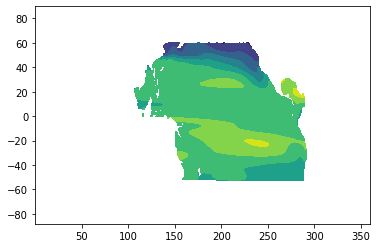

In [79]:
plt.contourf(temp280pac.lon,temp280pac.lat,temp280pac0[0,:,:])

In [184]:
#Regrid
POP_1deg = xr.Dataset({'lat': (['lat'], np.linspace(-90,90,180)),'lon': (['lon'], np.linspace(0,360,360)),})
regridder = xe.Regridder(tempPI, POP_1deg, 'bilinear', periodic= True)
regridder2 = xe.Regridder(temp280, POP_1deg, 'bilinear', periodic= True)

tempPI_1deg = regridder(tempPIpac0)
temp280_1deg = regridder2(temp280pac0)
temp400_1deg = regridder2(temp400pac0)
temp560_1deg = regridder2(temp560pac0)
temp840_1deg = regridder2(temp840pac0)

saltPI_1deg = regridder(saltPIpac0)
salt280_1deg = regridder2(salt280pac0)
salt400_1deg = regridder2(salt400pac0)
salt560_1deg = regridder2(salt560pac0)
salt840_1deg = regridder2(salt840pac0)

iagePI_1deg = regridder(iagePIpac0)
iage280_1deg = regridder2(iage280pac0)
iage400_1deg = regridder2(iage400pac0)
iage560_1deg = regridder2(iage560pac0)
iage840_1deg = regridder2(iage840pac0)

d18OPI_1deg = regridder(d18OPIpac0)
d18O280_1deg = regridder2(d18O280pac0)
d18O400_1deg = regridder2(d18O400pac0)
d18O560_1deg = regridder2(d18O560pac0)
d18O840_1deg = regridder2(d18O840pac0)


Overwrite existing file: bilinear_384x320_180x360_peri.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: bilinear_384x320_180x360_peri.nc 
 You can set reuse_weights=True to save computing time.


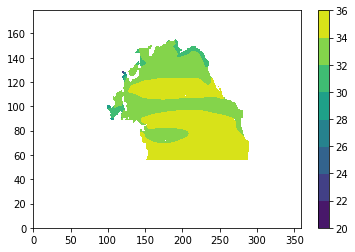

In [185]:
plt.contourf(saltPI_1deg[0,:,:])
plt.colorbar()

In [186]:
# Create Zonal Mean
warnings.filterwarnings('ignore')
#pr280.mean(dim='lon', keep_attrs = True)

tempPI_1degZM = tempPI_1deg.mean(dim='lon', keep_attrs = True)
temp280_1degZM = temp280_1deg.mean(dim='lon', keep_attrs = True)
temp400_1degZM = temp400_1deg.mean(dim='lon', keep_attrs = True)
temp560_1degZM = temp560_1deg.mean(dim='lon', keep_attrs = True)
temp840_1degZM = temp840_1deg.mean(dim='lon', keep_attrs = True)


saltPI_1degZM = saltPI_1deg.mean(dim='lon', keep_attrs = True)
salt280_1degZM = salt280_1deg.mean(dim='lon', keep_attrs = True)
salt400_1degZM = salt400_1deg.mean(dim='lon', keep_attrs = True)
salt560_1degZM = salt560_1deg.mean(dim='lon', keep_attrs = True)
salt840_1degZM = salt840_1deg.mean(dim='lon', keep_attrs = True)

iagePI_1degZM = iagePI_1deg.mean(dim='lon', keep_attrs = True)
iage280_1degZM = iage280_1deg.mean(dim='lon', keep_attrs = True)
iage400_1degZM = iage400_1deg.mean(dim='lon', keep_attrs = True)
iage560_1degZM = iage560_1deg.mean(dim='lon', keep_attrs = True)
iage840_1degZM = iage840_1deg.mean(dim='lon', keep_attrs = True)

d18OPI_1degZM = d18OPI_1deg.mean(dim='lon', keep_attrs = True)
d18O280_1degZM = d18O280_1deg.mean(dim='lon', keep_attrs = True)
d18O400_1degZM = d18O400_1deg.mean(dim='lon', keep_attrs = True)
d18O560_1degZM = d18O560_1deg.mean(dim='lon', keep_attrs = True)
d18O840_1degZM = d18O840_1deg.mean(dim='lon', keep_attrs = True)

#tempPI_1degZM

In [105]:
#Plotting
lo = -0.3
hi = 0.3
dc = 0.025
#cnlevels = np.arange(lo, hi+dc, dc)
cnlevels = np.arange(-10, 10, 1)

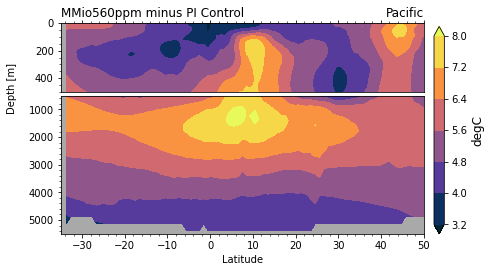

In [187]:
# create a figure object
fig = plt.figure(figsize=(7.2, 4.8))

# add two axes
ax1 = fig.add_axes([0.1, 0.51, 0.7, 0.2]) # top 1000 m
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.4]) # deep ocean

# set the background color where 
ax1.set_facecolor('darkgray')
ax2.set_facecolor('darkgray')
color =gvcmaps.cmocean_thermal
cnlevels = np.arange(-10, 10, 1)
# plot the field by looping over axes
cs = [None]*2 # dimension lists
mesh = [None]*2

for i, ax in enumerate([ax1, ax2]):
    mesh[i] = ax.contourf(temp560_1degZM.lat, temp560_1degZM.depth*1e-2, temp560_1degZM-tempPI_1degZM,
                          #levels=cnlevels,
                          #cmap=my_colormap,
                          cmap=color,
                          extend='both')

#cmap='RdBu_r'
    
# set axis limits, note the reversed limits reverse the y-axis
ax1.set_ylim([500., 0.])
ax2.set_ylim([5500., 500.])
ax1.set_xlim([-35, 50])
ax2.set_xlim([-35, 50])

# add contour line labels after axis limits have been set
#for csi in cs:
#    lb = plt.clabel(csi, fontsize=8, inline=True, fmt='%.0f')    

colorbar_axes = plt.gcf().add_axes([0.82, 0.1, 0.02, 0.6])
colorbar = plt.colorbar(mesh[i], colorbar_axes, orientation='vertical')
colorbar.set_label('%s' % 'degC',size=12)

# set tick properties top axis
ax1.set_xticklabels([])
ax1.set_yticklabels(np.arange(0, 500, 200))
ax1.minorticks_on()
ax1.xaxis.set_ticks_position('top')

# set tick properties bottom axis
ax2.minorticks_on()
ax2.set_xlabel('Latitude')
ax2.xaxis.set_ticks_position('bottom')

# axis label
ax2.set_ylabel('Depth [m]')
ax2.yaxis.set_label_coords(-0.12, 1.05)

# title
ax1.set_title('MMio560ppm minus PI Control',loc='left')
ax1.set_title('Pacific',loc='right');

plt.rcParams['pdf.fonttype']=42

#plt.show()
plotdir = '/glade/work/pacosta/tools/scripts/python_bin/MioMIP/Scripts/2_plots/ocn_plots/'
plt.savefig(plotdir+'Pacific_temp_MMio560ppm-PI_anom_ZM.pdf', format='pdf')

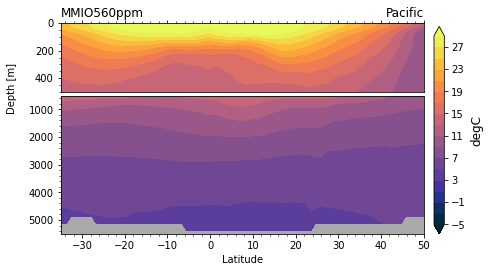

In [188]:
# create a figure object
fig = plt.figure(figsize=(7.2, 4.8))

# add two axes
ax1 = fig.add_axes([0.1, 0.51, 0.7, 0.2]) # top 1000 m
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.4]) # deep ocean

# set the background color where 
ax1.set_facecolor('darkgray')
ax2.set_facecolor('darkgray')
color =gvcmaps.cmocean_thermal
cnlevels = np.arange(-5, 30, 2)
# plot the field by looping over axes
cs = [None]*2 # dimension lists
mesh = [None]*2

for i, ax in enumerate([ax1, ax2]):
    mesh[i] = ax.contourf(temp560_1degZM.lat, temp560_1degZM.depth*1e-2, temp560_1degZM,
                          levels=cnlevels,
                          #cmap=my_colormap,
                          cmap=color,
                          extend='both')

#cmap='RdBu_r'
    
# set axis limits, note the reversed limits reverse the y-axis
ax1.set_ylim([500., 0.])
ax2.set_ylim([5500., 500.])
ax1.set_xlim([-35, 50])
ax2.set_xlim([-35, 50])

# add contour line labels after axis limits have been set
#for csi in cs:
#    lb = plt.clabel(csi, fontsize=8, inline=True, fmt='%.0f')    

colorbar_axes = plt.gcf().add_axes([0.82, 0.1, 0.02, 0.6])
colorbar = plt.colorbar(mesh[i], colorbar_axes, orientation='vertical')
colorbar.set_label('%s' % 'degC',size=12)

# set tick properties top axis
ax1.set_xticklabels([])
ax1.set_yticklabels(np.arange(0, 500, 200))
ax1.minorticks_on()
ax1.xaxis.set_ticks_position('top')

# set tick properties bottom axis
ax2.minorticks_on()
ax2.set_xlabel('Latitude')
ax2.xaxis.set_ticks_position('bottom')

# axis label
ax2.set_ylabel('Depth [m]')
ax2.yaxis.set_label_coords(-0.12, 1.05)

# title
ax1.set_title('MMIO560ppm',loc='left')
ax1.set_title('Pacific',loc='right');

plt.rcParams['pdf.fonttype']=42

#plt.show()
plotdir = '/glade/work/pacosta/tools/scripts/python_bin/MioMIP/Scripts/2_plots/ocn_plots/'
plt.savefig(plotdir+'Pacific_temp_MMIO560ppm_ZM.pdf', format='pdf')

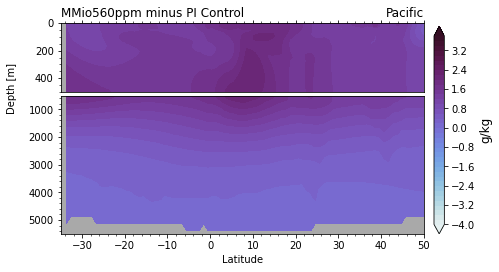

In [189]:
# create a figure object
fig = plt.figure(figsize=(7.2, 4.8))

# add two axes
ax1 = fig.add_axes([0.1, 0.51, 0.7, 0.2]) # top 1000 m
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.4]) # deep ocean

# set the background color where 
ax1.set_facecolor('darkgray')
ax2.set_facecolor('darkgray')
color =gvcmaps.cmocean_dense
cnlevels = np.arange(-4, 4, .2)
# plot the field by looping over axes
cs = [None]*2 # dimension lists
mesh = [None]*2

for i, ax in enumerate([ax1, ax2]):
    mesh[i] = ax.contourf(salt560_1degZM.lat, salt560_1degZM.depth*1e-2, salt560_1degZM-saltPI_1degZM[:,:],
                          levels=cnlevels,
                          vmin=min(cnlevels),
                          vmax=max(cnlevels),
                          #cmap=my_colormap,
                          cmap=color,
                          extend='both')

#cmap='RdBu_r'
    
# set axis limits, note the reversed limits reverse the y-axis
ax1.set_ylim([500., 0.])
ax2.set_ylim([5500., 500.])
ax1.set_xlim([-35, 50])
ax2.set_xlim([-35, 50])

# add contour line labels after axis limits have been set
#for csi in cs:
#    lb = plt.clabel(csi, fontsize=8, inline=True, fmt='%.0f')    

colorbar_axes = plt.gcf().add_axes([0.82, 0.1, 0.02, 0.6])
colorbar = plt.colorbar(mesh[i], colorbar_axes, orientation='vertical')
colorbar.set_label('%s' % 'g/kg',size=12)

# set tick properties top axis
ax1.set_xticklabels([])
ax1.set_yticklabels(np.arange(0, 500, 200))
ax1.minorticks_on()
ax1.xaxis.set_ticks_position('top')

# set tick properties bottom axis
ax2.minorticks_on()
ax2.set_xlabel('Latitude')
ax2.xaxis.set_ticks_position('bottom')

# axis label
ax2.set_ylabel('Depth [m]')
ax2.yaxis.set_label_coords(-0.12, 1.05)

# title
ax1.set_title('MMio560ppm minus PI Control',loc='left')
ax1.set_title('Pacific',loc='right');

plt.rcParams['pdf.fonttype']=42

#plt.show()
plotdir = '/glade/work/pacosta/tools/scripts/python_bin/MioMIP/Scripts/2_plots/ocn_plots/'
plt.savefig(plotdir+'Pacific_salinity_MMio560ppm-PI_anom_ZM.pdf', format='pdf')

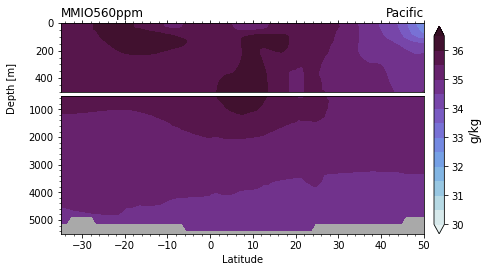

In [190]:
# create a figure object
fig = plt.figure(figsize=(7.2, 4.8))

# add two axes
ax1 = fig.add_axes([0.1, 0.51, 0.7, 0.2]) # top 1000 m
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.4]) # deep ocean

# set the background color where 
ax1.set_facecolor('darkgray')
ax2.set_facecolor('darkgray')
color =gvcmaps.cmocean_dense
cnlevels = np.arange(30, 37, .5)
# plot the field by looping over axes
cs = [None]*2 # dimension lists
mesh = [None]*2

for i, ax in enumerate([ax1, ax2]):
    mesh[i] = ax.contourf(salt560_1degZM.lat, salt560_1degZM.depth*1e-2, salt560_1degZM[:,:],
                          levels=cnlevels,
                          vmin=min(cnlevels),
                          vmax=max(cnlevels),
                          #cmap=my_colormap,
                          cmap=color,
                          extend='both')

#cmap='RdBu_r'
    
# set axis limits, note the reversed limits reverse the y-axis
ax1.set_ylim([500., 0.])
ax2.set_ylim([5500., 500.])
ax1.set_xlim([-35, 50])
ax2.set_xlim([-35, 50])

# add contour line labels after axis limits have been set
#for csi in cs:
#    lb = plt.clabel(csi, fontsize=8, inline=True, fmt='%.0f')    

colorbar_axes = plt.gcf().add_axes([0.82, 0.1, 0.02, 0.6])
colorbar = plt.colorbar(mesh[i], colorbar_axes, orientation='vertical')
colorbar.set_label('%s' % 'g/kg',size=12)

# set tick properties top axis
ax1.set_xticklabels([])
ax1.set_yticklabels(np.arange(0, 500, 200))
ax1.minorticks_on()
ax1.xaxis.set_ticks_position('top')

# set tick properties bottom axis
ax2.minorticks_on()
ax2.set_xlabel('Latitude')
ax2.xaxis.set_ticks_position('bottom')

# axis label
ax2.set_ylabel('Depth [m]')
ax2.yaxis.set_label_coords(-0.12, 1.05)

# title
ax1.set_title('MMIO560ppm',loc='left')
ax1.set_title('Pacific',loc='right');

plt.rcParams['pdf.fonttype']=42

#plt.show()
plotdir = '/glade/work/pacosta/tools/scripts/python_bin/MioMIP/Scripts/2_plots/ocn_plots/'
plt.savefig(plotdir+'Pacific_salinity_MMio560ppm_ZM.pdf', format='pdf')

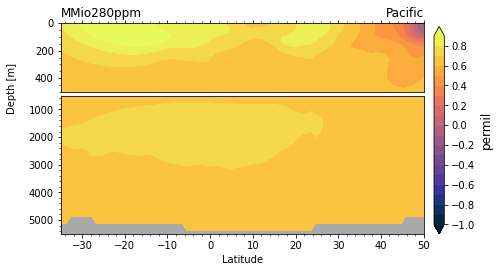

In [194]:
# create a figure object
fig = plt.figure(figsize=(7.2, 4.8))

# add two axes
ax1 = fig.add_axes([0.1, 0.51, 0.7, 0.2]) # top 1000 m
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.4]) # deep ocean

# set the background color where 
ax1.set_facecolor('darkgray')
ax2.set_facecolor('darkgray')
color =gvcmaps.cmocean_thermal
cnlevels = np.arange(-1, 1, .1)
# plot the field by looping over axes
cs = [None]*2 # dimension lists
mesh = [None]*2

for i, ax in enumerate([ax1, ax2]):
    mesh[i] = ax.contourf(d18O560_1degZM.lat, d18O560_1degZM.depth*1e-2, d18O280_1degZM,
                          levels=cnlevels,
                          #cmap=my_colormap,
                          cmap=color,
                          extend='both')

#cmap='RdBu_r'
    
# set axis limits, note the reversed limits reverse the y-axis
ax1.set_ylim([500., 0.])
ax2.set_ylim([5500., 500.])
ax1.set_xlim([-35, 50])
ax2.set_xlim([-35, 50])

# add contour line labels after axis limits have been set
#for csi in cs:
#    lb = plt.clabel(csi, fontsize=8, inline=True, fmt='%.0f')    

colorbar_axes = plt.gcf().add_axes([0.82, 0.1, 0.02, 0.6])
colorbar = plt.colorbar(mesh[i], colorbar_axes, orientation='vertical')
colorbar.set_label('%s' % 'permil',size=12)

# set tick properties top axis
ax1.set_xticklabels([])
ax1.set_yticklabels(np.arange(0, 500, 200))
ax1.minorticks_on()
ax1.xaxis.set_ticks_position('top')

# set tick properties bottom axis
ax2.minorticks_on()
ax2.set_xlabel('Latitude')
ax2.xaxis.set_ticks_position('bottom')

# axis label
ax2.set_ylabel('Depth [m]')
ax2.yaxis.set_label_coords(-0.12, 1.05)

# title
ax1.set_title('MMio280ppm',loc='left')
ax1.set_title('Pacific',loc='right');

plt.rcParams['pdf.fonttype']=42

#plt.show()
plotdir = '/glade/work/pacosta/tools/scripts/python_bin/MioMIP/Scripts/2_plots/ocn_plots/'
plt.savefig(plotdir+'Pacific_d18O_MMio280ppm_ZM.pdf', format='pdf')

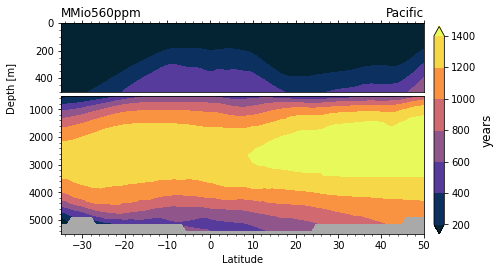

In [192]:
# create a figure object
fig = plt.figure(figsize=(7.2, 4.8))

# add two axes
ax1 = fig.add_axes([0.1, 0.51, 0.7, 0.2]) # top 1000 m
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.4]) # deep ocean

# set the background color where 
ax1.set_facecolor('darkgray')
ax2.set_facecolor('darkgray')
color =gvcmaps.cmocean_thermal
cnlevels = np.arange(-2, 2, .1)
# plot the field by looping over axes
cs = [None]*2 # dimension lists
mesh = [None]*2

for i, ax in enumerate([ax1, ax2]):
    mesh[i] = ax.contourf(d18O560_1degZM.lat, d18O560_1degZM.depth*1e-2, iage560_1degZM,
                          #levels=cnlevels,
                          #cmap=my_colormap,
                          cmap=color,
                          extend='both')

#cmap='RdBu_r'
    
# set axis limits, note the reversed limits reverse the y-axis
ax1.set_ylim([500., 0.])
ax2.set_ylim([5500., 500.])
ax1.set_xlim([-35, 50])
ax2.set_xlim([-35, 50])

# add contour line labels after axis limits have been set
#for csi in cs:
#    lb = plt.clabel(csi, fontsize=8, inline=True, fmt='%.0f')    

colorbar_axes = plt.gcf().add_axes([0.82, 0.1, 0.02, 0.6])
colorbar = plt.colorbar(mesh[i], colorbar_axes, orientation='vertical')
colorbar.set_label('%s' % 'years',size=12)

# set tick properties top axis
ax1.set_xticklabels([])
ax1.set_yticklabels(np.arange(0, 500, 200))
ax1.minorticks_on()
ax1.xaxis.set_ticks_position('top')

# set tick properties bottom axis
ax2.minorticks_on()
ax2.set_xlabel('Latitude')
ax2.xaxis.set_ticks_position('bottom')

# axis label
ax2.set_ylabel('Depth [m]')
ax2.yaxis.set_label_coords(-0.12, 1.05)

# title
ax1.set_title('MMio560ppm',loc='left')
ax1.set_title('Pacific',loc='right');

plt.rcParams['pdf.fonttype']=42

#plt.show()
plotdir = '/glade/work/pacosta/tools/scripts/python_bin/MioMIP/Scripts/2_plots/ocn_plots/'
plt.savefig(plotdir+'Pacific_iage_MMio560ppm_ZM.pdf', format='pdf')